<a href="https://colab.research.google.com/github/luisespriella9/Computer-Vision-Udemy/blob/master/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get files from drive


In [1]:
working_directory = 'DATA'

In [2]:
!dir DATA

 Volume in drive C is Local Disk
 Volume Serial Number is FE3C-B042

 Directory of C:\Users\luisf\github\Computer-Vision-Udemy\DATA

05/27/2020  11:08 AM    <DIR>          .
05/27/2020  11:08 AM    <DIR>          ..
05/27/2020  11:08 AM    <DIR>          .ipynb_checkpoints
05/27/2020  11:08 AM           193,288 00-puppy.jpg
05/27/2020  11:08 AM            46,400 bank_note_data.txt
05/27/2020  11:08 AM           500,238 bricks.jpg
05/27/2020  11:08 AM           494,070 cartoon_receipt.jpg
05/27/2020  11:08 AM            22,394 car_plate.jpg
05/27/2020  11:08 AM         1,036,601 chessboard_mat.jpg
05/27/2020  11:08 AM         2,918,981 coins_on_white.jpg
05/27/2020  11:08 AM           533,390 crossword.jpg
05/27/2020  11:08 AM         2,949,661 damien_hirst_dot.jpg
05/27/2020  11:08 AM           127,252 Denis_Mukwege.jpg
05/27/2020  11:08 AM           167,836 dog_backpack.jpg
05/27/2020  11:08 AM           167,836 dog_backpack.png
05/27/2020  11:08 AM             7,627 dot_grid.png
05/2

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_image(path, gray=False):
    if (gray):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if (img is None):
        print("could not read image in path: ", path)
    return img

def show_image(img, gray=False):
    if gray:
      plt.imshow(img, cmap='gray') 
    else:
      plt.imshow(img)
    plt.axis('off')
    plt.show()

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Corner Detection

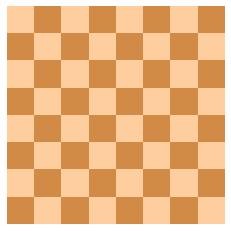

In [5]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
show_image(flat_chess)

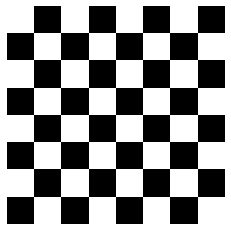

In [6]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
show_image(gray_flat_chess, gray=True)

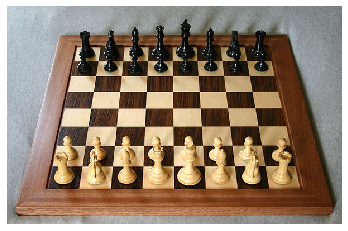

In [7]:
real_chess = load_image(working_directory+'/real_chessboard.jpg')
show_image(real_chess)

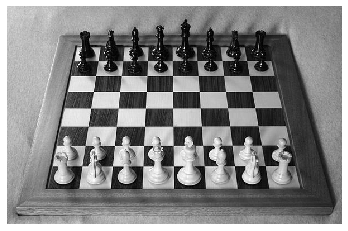

In [8]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
show_image(gray_real_chess, gray=True)

## Apply Harris Corner Detection to both Images

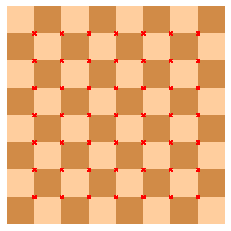

In [9]:
gray_flat_chess = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray_flat_chess, blockSize=2, ksize=5, k=0.04)

dst = cv2.dilate(dst, None)

flat_chess[dst>0.01*dst.max()] = [255, 0, 0] # color red wherever the value is greater than 1% of the max value for harris corner
show_image(flat_chess)

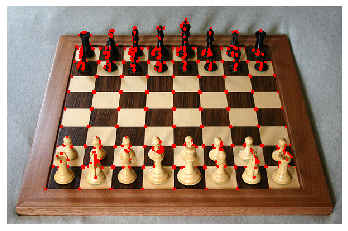

In [10]:
gray_real_chess = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray_real_chess, blockSize=2, ksize=5, k=0.04)

dst = cv2.dilate(dst, None)

real_chess[dst>0.01*dst.max()] = [255, 0, 0] # color red wherever the value is greater than 1% of the max value for harris corner
show_image(real_chess)

## Apply Shi-Tomasi Corner Detection to both Images

In [11]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
real_chess = load_image(working_directory+'/real_chessboard.jpg')
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

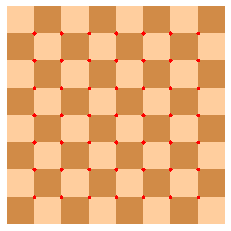

In [12]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, maxCorners=64, qualityLevel=0.01, minDistance=10, corners=10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255, 0, 0), -1)

show_image(flat_chess)

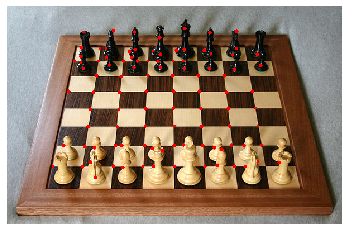

In [13]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255, 0, 0), -1)

show_image(real_chess)

# Edge Detection

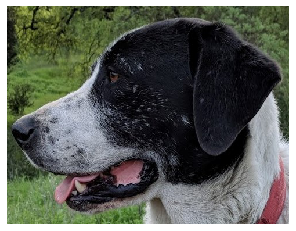

In [14]:
sammy_face = load_image(working_directory+'/sammy_face.jpg')
show_image(sammy_face)

blurred


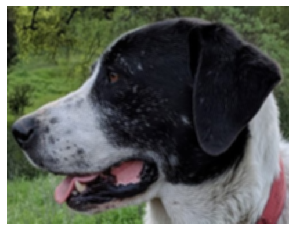

edge detection


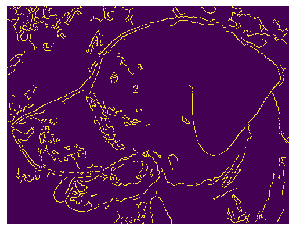

In [15]:
# blur image
blurred_sammy_face = cv2.blur(sammy_face, ksize=(5, 5))
print("blurred")
show_image(blurred_sammy_face)
median_pixel_val = np.median(blurred_sammy_face)
lower_th = int(max(0, 0.7*median_pixel_val))
upper_th = int(min(255, 1.3*median_pixel_val))
edges = cv2.Canny(blurred_sammy_face, threshold1=lower_th, threshold2=upper_th+50)
print("edge detection")
show_image(edges)

# Grid Detection

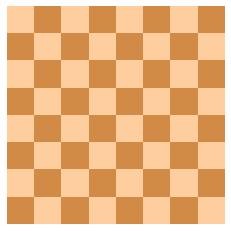

In [16]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
show_image(flat_chess)

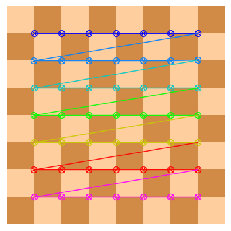

In [17]:
found, corners = cv2.findChessboardCorners(flat_chess, (7, 7))
if found:
    cv2.drawChessboardCorners(flat_chess, (7, 7), corners, found)
show_image(flat_chess)

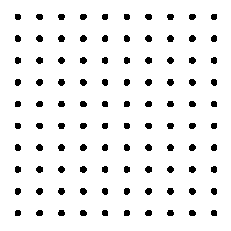

In [18]:
dots = load_image(working_directory+'/dot_grid.png')
show_image(dots)

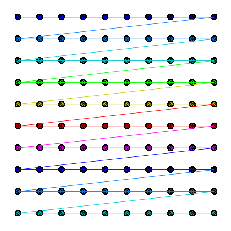

In [19]:
found, corners = cv2.findCirclesGrid(dots, (10, 10), cv2.CALIB_CB_SYMMETRIC_GRID)
if found:
    cv2.drawChessboardCorners(dots, (10, 10), corners, found)
show_image(dots)

# Contour Detection

shape:  (652, 1080)


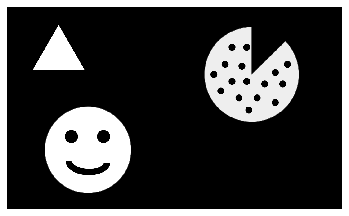

In [20]:
shapes = load_image(working_directory+'/internal_external.png', gray=True)
print("shape: ", shapes.shape)
show_image(shapes, gray=True)

In [21]:
_, contours, hierarchy = cv2.findContours(shapes, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(shapes.shape)
internal_contours = np.zeros(shapes.shape)
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [22]:
for i in range(len(contours)):
    # if external contour (actually touching the background)
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
    else:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

external contours (aka actually touching the background)


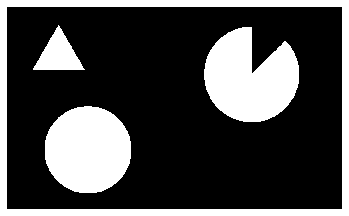

In [23]:
print("external contours (aka actually touching the background)")
show_image(external_contours, gray=True)

internal contours (aka touching a foreground object)


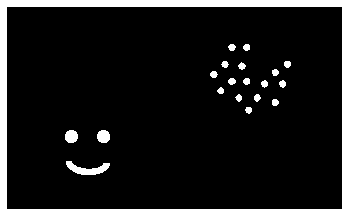

In [24]:
print("internal contours (aka touching a foreground object)")
show_image(internal_contours, gray=True)

# Feature Matching

## Brute force matching with ORB Descriptors

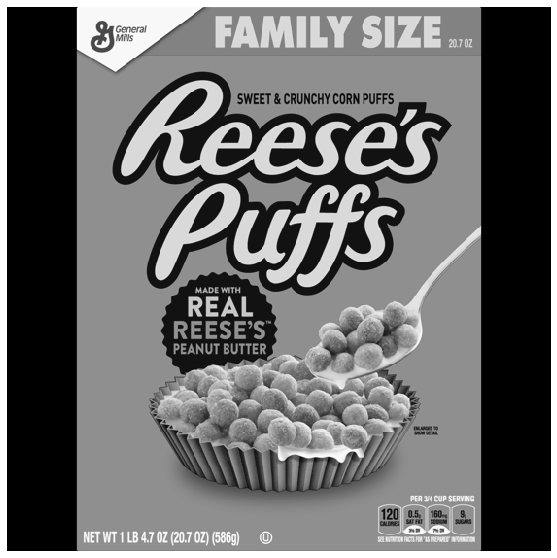

In [25]:
reeses = load_image(working_directory+'/reeses_puffs.png', gray=True)
display(reeses)

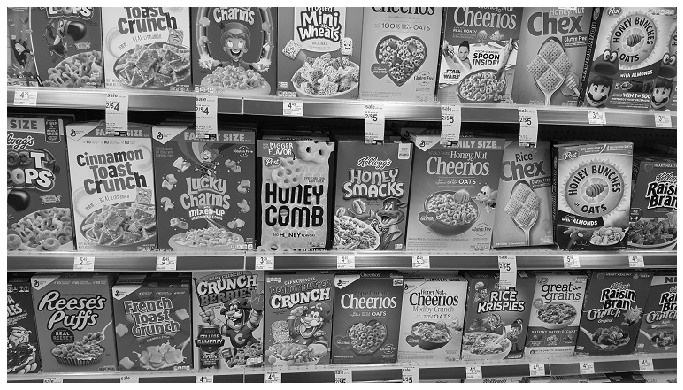

In [26]:
cereals = load_image(working_directory+'/many_cereals.jpg', gray=True)
display(cereals)

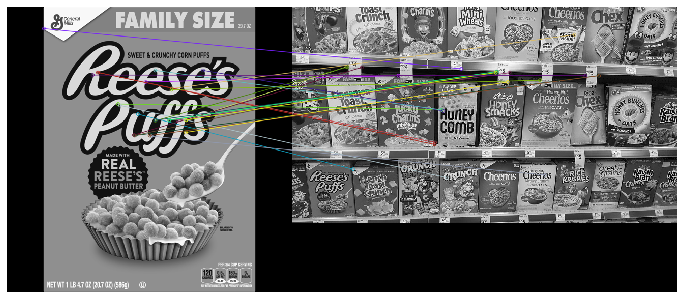

In [27]:
orb_detector = cv2.ORB_create()
key_points_reeses, descriptors_reeses = orb_detector.detectAndCompute(reeses, mask=None)
key_points_cereals, descriptors_cereals = orb_detector.detectAndCompute(cereals, mask=None)

brute_force_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = brute_force_matcher.match(descriptors_reeses, descriptors_cereals)

matches = sorted(matches, key=lambda x:x.distance)
if (len(matches) > 25):
    matches = matches[:25]

reeses_matches = cv2.drawMatches(reeses, key_points_reeses, cereals, key_points_cereals, matches, outImg=None, matchesMask=None, flags=2)
display(reeses_matches)

In [28]:
print("SIFT and FLANN work much better, however SIFT is not available for opencv anymore")

SIFT and FLANN work much better, however SIFT is not available for opencv anymore


# Watershed Algorithm

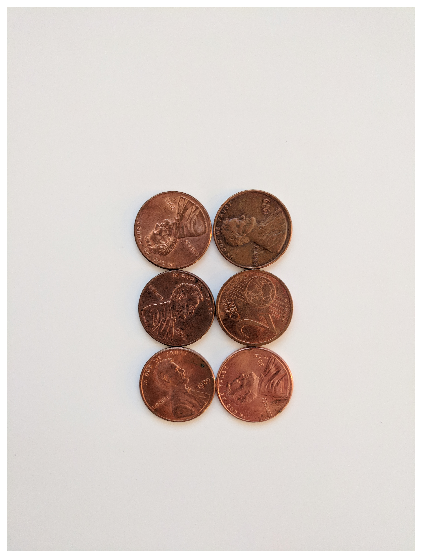

In [29]:
sep_coins = load_image(working_directory+'/pennies.jpg')
display(sep_coins)

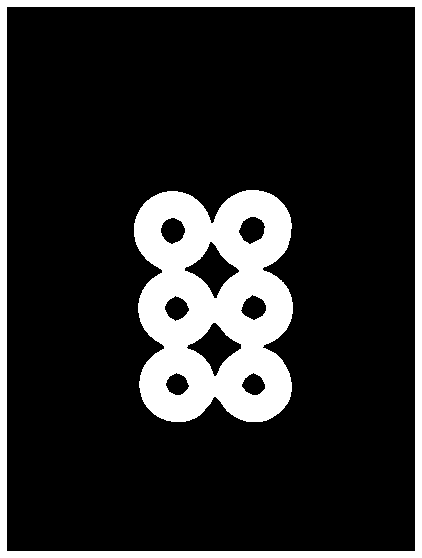

In [30]:
blurred_coins = cv2.medianBlur(sep_coins, 35)
gray_coins = cv2.cvtColor(blurred_coins, cv2.COLOR_RGB2GRAY)
ret, th_coins = cv2.threshold(gray_coins, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #use otsu's method for threshold when using waterfall algorithm
# noise removal
kernel = np.ones((3, 3), np.uint8)
coins = cv2.morphologyEx(th_coins, cv2.MORPH_OPEN, kernel, iterations=2)

# perform distance transforms
dist_transform = cv2.distanceTransform(coins, cv2.DIST_L2, 5)

ret, sure_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

unknown = cv2.subtract(np.asarray(coins, dtype=np.uint8), np.asarray(sure_foreground, dtype=np.uint8))

display(unknown)

Assign Markers

markers


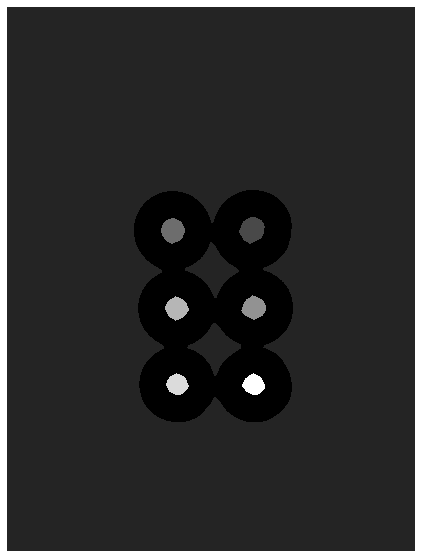

In [31]:
sure_foreground = np.uint8(sure_foreground)
ret, markers = cv2.connectedComponents(sure_foreground)
markers = markers+1
markers[unknown==255] = 0
print("markers")
display(markers)

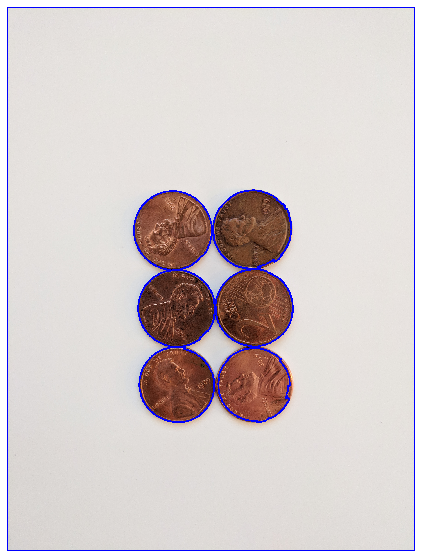

In [32]:
# apply watershed algorithm
markers = cv2.watershed(sep_coins, markers)
_, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins, contours, i, (0, 0, 255), 10)
display(sep_coins)

# Custom Seeds with watershed algorithm

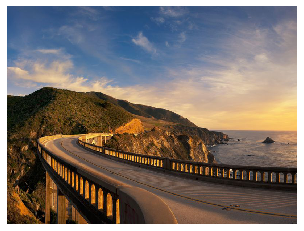

In [33]:
road = load_image(working_directory+'/road_image.jpg')
road_copy = road.copy()
show_image(road)

In [34]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)
print("marker image shape: ", marker_image.shape)
print("segments shape: ", segments.shape)

marker image shape:  (600, 800)
segments shape:  (600, 800, 3)


In [35]:
from matplotlib import cm

def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

colors = []
for i in range(10):
    colors.append(create_rgb(i))
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [36]:
## global variable
# color choice
current_marker = 1
marks_updated = False

## callback function

def mouse_callback(event, x, y, flags, params):
    global current_marker, marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # markers passed to the watershed algorithm
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)

        # user sees
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)

        marks_updated = True

## while true
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Watershed segments', segments)
    cv2.imshow('Road Image', road_copy)

    # close all windows
    k = cv2.waitKey(1)
    if k==27:
        break

    # clearing all the colors
    elif k==ord('c'):
      # reset everything
      road_copy = road.copy()
      marker_image = np.zeros(road.shape[:2], dtype=np.int32)
      segments = np.zeros(road.shape, dtype=np.uint8)

    # update color choice
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))

    # update the markings
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)

        segments = np.zeros(road.shape, dtype=np.uint8)
        for color_ind in range(10):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]

cv2.destroyAllWindows()